# COMP3330 - Individual Assignment - Nathan Vilmen

## Question 1: Variation of the Two-Spiral Task

### Subquestion a)

In this question, we will use PyTorch to implement the artificial neural network. We will define our network by subclassing `torch.nn.Module`. We will then use PyTorch's autograd functionality to train the network using backpropagation.

1. Import needed libraries, load and pre-process the data

In [1]:
import torch
import matplotlib.pyplot as plt

# Check which device is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using: {}.'.format(device))

Using: cpu.


In [2]:
import pandas
import numpy as np

# file path
csv_file = 'spiralsdataset.csv'

# read the file and create the points
data = pandas.read_csv(csv_file, header=None, names=['x1','x2','y'])

# preview of the data
print(data.head(25))

# create the points' coordinates by splitting into numpy arrays with features and labels
X = data[['x1', 'x2']].to_numpy()
Y = data[['y']].to_numpy().flatten()

# verify the shape of the data : expected to have 194 rows
print(X.shape)
print(Y.shape)

         x1       x2  y
0   6.50000  0.00000  0
1  -6.50000 -0.00000  1
2   6.31380  1.25590  0
3  -6.31380 -1.25590  1
4   5.88973  2.43961  0
5  -5.88973 -2.43961  1
6   5.24865  3.50704  0
7  -5.24865 -3.50704  1
8   4.41941  4.41943  0
9  -4.41941 -4.41943  1
10  3.43758  5.14473  0
11 -3.43758 -5.14473  1
12  2.34392  5.65877  0
13 -2.34392 -5.65877  1
14  1.18272  5.94601  0
15 -1.18272 -5.94601  1
16 -0.00002  6.00000  0
17  0.00002 -6.00000  1
18 -1.15837  5.82341  0
19  1.15837 -5.82341  1
20 -2.24829  5.42778  0
21  2.24829 -5.42778  1
22 -3.22928  4.83290  0
23  3.22928 -4.83290  1
24 -4.06589  4.06584  0
(194, 2)
(194,)


Plot the dataset to get an idea of the shape of the dataset, even though we are expecting to see a spiral-shaped dataset.

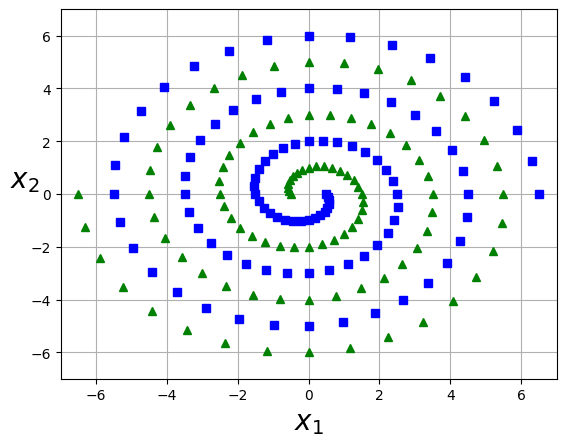

In [3]:
def plot_dataset(X, y, axes):
    """Plot a dataset with two features and binary classes"""
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

# we know from the preview in the sheet that the x-range is approximately -7 to 7
axes = [-7, 7, -7, 7]
plot_dataset(X, Y, axes)

2. Let's define our input data x and label data y as tensors. We are using float32 as data type.

In [4]:
# Input data
x = torch.tensor(X, dtype=torch.float32, device=device)
# check for consistency: x must have 2 columns with 194 rows
print(x.shape)

# Label data
y = torch.tensor(Y, dtype=torch.float32, device=device).view(194,1)
# check for consistency: y must have 1 column with 194 rows
print(y.shape)

torch.Size([194, 2])
torch.Size([194, 1])


3. To define our network, we subclass `torch.nn.Module` and use the pre-defined layers included in PyTorch.
The layer type we will use here for hidden and output layer is `torch.nn.Linear`. This layer performs the perceptron calculation: $\vec{y} = \textbf{W}\vec{x} + \vec{b}$

In [5]:
class ANN(torch.nn.Module):
    # Here we define the layers of this network.
    def __init__(self):
        super().__init__()
        # Hidden layer which takes 2 bits as inputs and has 8 units
        self.hidden = torch.nn.Linear(2, 8, bias=True)
        # Second hidden layer which takes 8 bits as inputs and has 6 units
        self.hidden_2 = torch.nn.Linear(8, 6, bias=True)
        # Output layer with 8 inputs and 1 output
        self.output = torch.nn.Linear(6, 1, bias=True)
    # Implement the forward pass
    def forward(self, x):
        # apply the hidden layers
        out = torch.nn.Tanh()(self.hidden(x))
        out = torch.nn.Tanh()(self.hidden_2(out))
        # compute the output
        out = torch.nn.Tanh()(self.output(out))
        return out

4. Now we will define our model, loss function, and optimiser:

In [6]:
# Define the Model
model = ANN().to(device)

# Define the loss function
def loss_fn(y_true, y_pred):
    loss = torch.sqrt(torch.mean(torch.pow(y_true - y_pred, 2)))
    return loss

# Define the optimiser and tell it what parameters to update
optimiser = torch.optim.Adam(model.parameters(), lr=0.001)

5. Then we train our Neural Network:
At the start of each training step, we need to reset the gradients.
After that, we first do the *forward pass* by computing the network prediction, and calculate the loss by comparing the predictions with the true labels.
The *backward pass* is performed by simply calling `backward()` on the loss.
Finally, we update our weights by calling `step()` on our optimiser.

In [7]:
MAX_EPOCHS = 30000 # One epoch means going through entire dataset once
LOSS_GOAL = 0.1
epoch = 0 # Initialise counter
losses = [] # Loss history
best_loss = float("inf") # Keep track of best loss for early stopping

while LOSS_GOAL < best_loss and MAX_EPOCHS > epoch:
    # Reset the gradients for all variables
    optimiser.zero_grad()
    # Forward pass: Calculate prediction
    y_pred = model(x)
    list_predictions.append(y_pred)
    # Calculate loss
    loss = loss_fn(y, y_pred)
    # Backward pass: Run backpropagation
    loss.backward()
    # Adjust weights
    optimiser.step()
    # Save latest loss
    losses.append(loss.item())
    if loss < best_loss:
        best_loss = loss
    if epoch % 1000 == 0:
        print("Loss in epoch {}: {:.4f}".format(epoch, loss))
    epoch += 1

Loss in epoch 0: 0.8229
Loss in epoch 1000: 0.4929
Loss in epoch 2000: 0.4847
Loss in epoch 3000: 0.4708
Loss in epoch 4000: 0.4469
Loss in epoch 5000: 0.4167
Loss in epoch 6000: 0.3867
Loss in epoch 7000: 0.3634
Loss in epoch 8000: 0.3506
Loss in epoch 9000: 0.3413
Loss in epoch 10000: 0.3295
Loss in epoch 11000: 0.3222
Loss in epoch 12000: 0.3088
Loss in epoch 13000: 0.3052
Loss in epoch 14000: 0.3030
Loss in epoch 15000: 0.3008
Loss in epoch 16000: 0.2989
Loss in epoch 17000: 0.2977
Loss in epoch 18000: 0.2969
Loss in epoch 19000: 0.2962
Loss in epoch 20000: 0.2957
Loss in epoch 21000: 0.2953
Loss in epoch 22000: 0.2949
Loss in epoch 23000: 0.2946
Loss in epoch 24000: 0.2944
Loss in epoch 25000: 0.2941
Loss in epoch 26000: 0.2940
Loss in epoch 27000: 0.2937
Loss in epoch 28000: 0.2936
Loss in epoch 29000: 0.2934


6. We make a final prediction, that should be close to the y initial values : `[[0],[1],[0],[1],[0],[1],...]`

In [8]:
y_pred_final = model(x)
loss_final = loss_fn(y_pred_final, y)
# display the final prediction
print(y_pred_final)
print("Loss for final weights: {:.4f}".format(loss_final))

tensor([[ 4.5250e-02],
        [ 1.0000e+00],
        [ 8.9776e-03],
        [ 1.0000e+00],
        [ 7.3861e-03],
        [ 1.0000e+00],
        [ 1.1774e-01],
        [ 1.0000e+00],
        [-6.1454e-02],
        [ 9.8110e-01],
        [-1.5424e-01],
        [ 9.0511e-01],
        [ 1.0284e-01],
        [ 9.3384e-01],
        [-5.2328e-03],
        [ 9.3723e-01],
        [-5.4478e-02],
        [ 5.9407e-01],
        [-2.6343e-02],
        [ 5.9426e-01],
        [ 1.1091e-01],
        [ 8.5565e-01],
        [-3.2165e-02],
        [ 6.2220e-01],
        [-4.2997e-01],
        [ 6.1238e-01],
        [ 5.3653e-03],
        [ 4.7248e-01],
        [-3.2091e-03],
        [ 5.9181e-01],
        [ 1.4983e-02],
        [ 5.8905e-01],
        [-4.0827e-03],
        [ 5.6306e-01],
        [ 3.8528e-03],
        [ 8.4865e-01],
        [-8.8070e-03],
        [ 9.5298e-01],
        [ 1.6849e-02],
        [ 9.9863e-01],
        [-4.9686e-04],
        [ 9.3938e-01],
        [ 4.8952e-03],
        [ 9

We can then compute and show the accuracy:

Accuracy: 85.05%


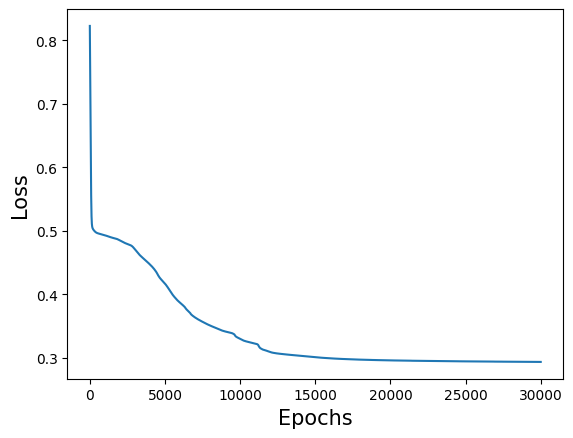

In [9]:
accuracy = torch.sum(torch.round(y_pred_final) == y) / len(y) * 100
print("Accuracy: {:.2f}%".format(accuracy))
plt.plot(losses)
plt.xlabel(r"Epochs", fontsize=15)
plt.ylabel(r"Loss", fontsize=15)
plt.show()

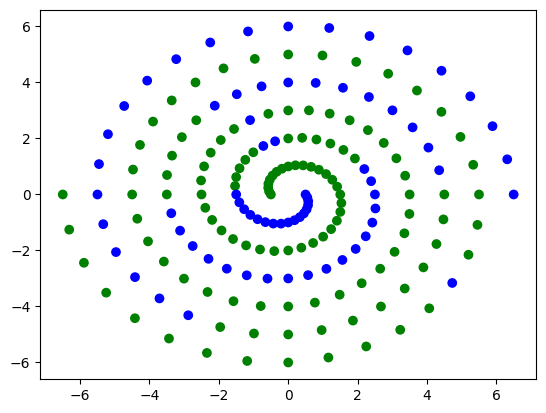

In [10]:
# Color the points based on the values in the y matrix
colors = ['b' if label <= 0.5 else 'g' for label in y_pred_final]
# Plot the points
plt.scatter(x[:, 0], x[:, 1], c=colors)
plt.show()

In [61]:
from sklearn.svm import SVC
svm = SVC(C=1, kernel='rbf', gamma=5)
svm.fit(X, Y)

SVC(C=1, gamma=5)

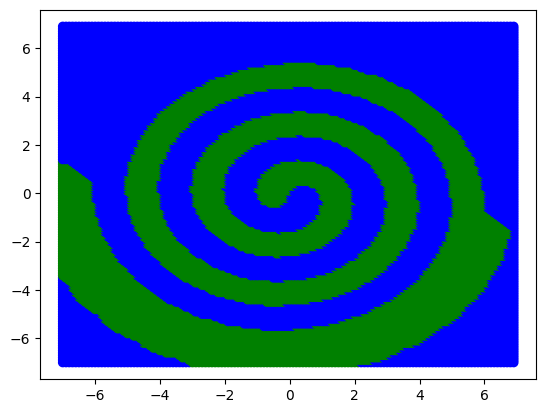

In [62]:
# Visualise activations
activation_range = np.arange(-7, 7, 0.1) # interval of [-7, 7] with step size 0.1
test_coordinates = [(x,y) for y in activation_range for x in activation_range]
test_classifications = svm.predict(test_coordinates)
x_, y_ = np.meshgrid(activation_range, activation_range)
plt.scatter(x_, y_, c=['g' if x_ > 0 else 'b' for x_ in test_classifications])
plt.show()